In [326]:
## This notebook has analyses to explore the offset error in FR1 and catFR1
## and the related beep times/reaction times that helped us diagnose this error
## 2020-09-15 JS

In [2]:
import pandas as pd; pd.set_option('display.max_columns', 30)
import numpy as np
from cmlreaders import CMLReader, get_data_index
from ptsa.data.filters import ButterworthFilter
import sys
import os
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import *
from copy import copy
from scipy import stats
import pickle
plt.rcParams['pdf.fonttype'] = 42; plt.rcParams['ps.fonttype'] = 42 # fix fonts for Illustrator
sys.path.append('/home1/john/Downloads/ptsa_plot-master/')
sys.path.append('/home1/john/johnModules')
from brain_labels import MTL_labels, LTC_labels, PFC_labels, OTHER_labels, ALL_labels # all location labels
%load_ext autoreload
%autoreload
from general import *
from SWRmodule import *
from PS3module import findStimbp

df = get_data_index("r1") # all RAM subjects
exp = 'FR1' # 'FR1' 'catFR1'

/home1/john/anaconda3/envs/env1/lib/python3.7/site-packages/ptsa/data/timeseries.py:526: FutureWarning: xarray subclass TimeSeriesX should explicitly define __slots__
  class TimeSeriesX(TimeSeries):


In [85]:
# subs with catFR post-recall bump
subs = ['R1423E'] #['R1385E'] # R1405E, R1486J, R1385E
# ['R1398J'] when 1 s rise goes away; date of mstime: 2018-03-27
# ['R1385E'] date of mstime: 2018-01-11
# ['R1372C'] beginning of 1 sec rise in first recall time from ret_on ; date of mstime: 2017-11-27
# ['R1320D'] first time first recall times is 0 s  ; date of mstime: 2017-07-29

# sub lists to explore catFR

exp_sub_df = df[(df.subject.isin(subs))  & (df.experiment == exp)] # all sessions for subs
# exp_sub_df = df[(df.subject.isin(subs))  & (df.experiment == exp) & (df.session==1)] # single session
# exp_sub_df = df[(df.experiment == exp) & (df.session == 0)] # all FR subs 
# exp_sub_df = exp_sub_df[-2:-1]
exp_sub_df

sub_df = df[(df.subject.isin(subs))]
# all_df = all_df[0:1]
sub_df

exp_df = df[(df.experiment == exp)]
# temp_exp_df = exp_df[258:] # for catFR1 ≥R1385E
temp_exp_df = exp_df[:258]
# temp_exp_df = exp_df[493:] # for FR1 ≥R1385E
# temp_exp_df = exp_df[:493]
exp_df[250:]
exp_df

,Recognition,all_events,contacts,experiment,import_type,localization,math_events,montage,original_experiment,original_session,pairs,ps4_events,session,subject,subject_alias,system_version,task_events
2048,NaN,protocols/r1/subjects/R1423E/experiments/FR1/s...,protocols/r1/subjects/R1423E/localizations/0/m...,FR1,build,0,protocols/r1/subjects/R1423E/experiments/FR1/s...,0,NaN,NaN,protocols/r1/subjects/R1423E/localizations/0/m...,NaN,0,R1423E,R1423E,3.4,protocols/r1/subjects/R1423E/experiments/FR1/s...


,Recognition,all_events,contacts,experiment,import_type,localization,math_events,montage,original_experiment,original_session,pairs,ps4_events,session,subject,subject_alias,system_version,task_events
2048,NaN,protocols/r1/subjects/R1423E/experiments/FR1/s...,protocols/r1/subjects/R1423E/localizations/0/m...,FR1,build,0,protocols/r1/subjects/R1423E/experiments/FR1/s...,0,NaN,NaN,protocols/r1/subjects/R1423E/localizations/0/m...,NaN,0,R1423E,R1423E,3.4,protocols/r1/subjects/R1423E/experiments/FR1/s...
2049,NaN,protocols/r1/subjects/R1423E/experiments/catFR...,protocols/r1/subjects/R1423E/localizations/0/m...,catFR1,build,0,protocols/r1/subjects/R1423E/experiments/catFR...,0,NaN,NaN,protocols/r1/subjects/R1423E/localizations/0/m...,NaN,0,R1423E,R1423E,3.4,protocols/r1/subjects/R1423E/experiments/catFR...


,Recognition,all_events,contacts,experiment,import_type,localization,math_events,montage,original_experiment,original_session,pairs,ps4_events,session,subject,subject_alias,system_version,task_events
1021,NaN,protocols/r1/subjects/R1178P/experiments/FR1/s...,protocols/r1/subjects/R1178P/localizations/0/m...,FR1,build,0,protocols/r1/subjects/R1178P/experiments/FR1/s...,0,NaN,0,protocols/r1/subjects/R1178P/localizations/0/m...,NaN,0,R1178P,R1178P,2.0,protocols/r1/subjects/R1178P/experiments/FR1/s...
1022,NaN,protocols/r1/subjects/R1178P/experiments/FR1/s...,protocols/r1/subjects/R1178P/localizations/0/m...,FR1,build,0,protocols/r1/subjects/R1178P/experiments/FR1/s...,0,NaN,1,protocols/r1/subjects/R1178P/localizations/0/m...,NaN,1,R1178P,R1178P,2.0,protocols/r1/subjects/R1178P/experiments/FR1/s...
1037,NaN,protocols/r1/subjects/R1184M/experiments/FR1/s...,protocols/r1/subjects/R1184M/localizations/0/m...,FR1,build,0,protocols/r1/subjects/R1184M/experiments/FR1/s...,0,NaN,0,protocols/r1/subjects/R1184M/localizations/0/m...,NaN,0,R1184M,R1184M,NaN,protocols/r1/subjects/R1184M/experiments/FR1/s...
1048,NaN,protocols/r1/subjects/R1185N/experiments/FR1/s...,protocols/r1/subjects/R1185N/localizations/1/m...,FR1,build,1,protocols/r1/subjects/R1185N/experiments/FR1/s...,1,NaN,0,protocols/r1/subjects/R1185N/localizations/1/m...,NaN,0,R1185N,R1185N_1,NaN,protocols/r1/subjects/R1185N/experiments/FR1/s...
1056,NaN,protocols/r1/subjects/R1186P/experiments/FR1/s...,protocols/r1/subjects/R1186P/localizations/0/m...,FR1,build,0,protocols/r1/subjects/R1186P/experiments/FR1/s...,0,NaN,0,protocols/r1/subjects/R1186P/localizations/0/m...,NaN,0,R1186P,R1186P,NaN,protocols/r1/subjects/R1186P/experiments/FR1/s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2147,NaN,protocols/r1/subjects/R1462M/experiments/FR1/s...,protocols/r1/subjects/R1462M/localizations/0/m...,FR1,build,0,protocols/r1/subjects/R1462M/experiments/FR1/s...,0,NaN,NaN,protocols/r1/subjects/R1462M/localizations/0/m...,NaN,0,R1462M,R1462M,3.4,protocols/r1/subjects/R1462M/experiments/FR1/s...
2149,NaN,protocols/r1/subjects/R1463E/experiments/FR1/s...,protocols/r1/subjects/R1463E/localizations/1/m...,FR1,build,1,protocols/r1/subjects/R1463E/experiments/FR1/s...,1,NaN,0,protocols/r1/subjects/R1463E/localizations/1/m...,NaN,0,R1463E,R1463E_1,3.4,protocols/r1/subjects/R1463E/experiments/FR1/s...
2150,NaN,protocols/r1/subjects/R1463E/experiments/FR1/s...,protocols/r1/subjects/R1463E/localizations/1/m...,FR1,build,1,protocols/r1/subjects/R1463E/experiments/FR1/s...,1,NaN,1,protocols/r1/subjects/R1463E/localizations/1/m...,NaN,1,R1463E,R1463E_1,3.4,protocols/r1/subjects/R1463E/experiments/FR1/s...
2164,NaN,protocols/r1/subjects/R1466J/experiments/FR1/s...,protocols/r1/subjects/R1466J/localizations/0/m...,FR1,build,0,protocols/r1/subjects/R1466J/experiments/FR1/s...,0,NaN,NaN,protocols/r1/subjects/R1466J/localizations/0/m...,NaN,0,R1466J,R1466J,3.4,protocols/r1/subjects/R1466J/experiments/FR1/s...


,Recognition,all_events,contacts,experiment,import_type,localization,math_events,montage,original_experiment,original_session,pairs,ps4_events,session,subject,subject_alias,system_version,task_events
0,NaN,protocols/r1/subjects/R1001P/experiments/FR1/s...,protocols/r1/subjects/R1001P/localizations/0/m...,FR1,build,0,protocols/r1/subjects/R1001P/experiments/FR1/s...,0,NaN,0,protocols/r1/subjects/R1001P/localizations/0/m...,NaN,0,R1001P,R1001P,NaN,protocols/r1/subjects/R1001P/experiments/FR1/s...
1,NaN,protocols/r1/subjects/R1001P/experiments/FR1/s...,protocols/r1/subjects/R1001P/localizations/0/m...,FR1,build,0,protocols/r1/subjects/R1001P/experiments/FR1/s...,0,NaN,1,protocols/r1/subjects/R1001P/localizations/0/m...,NaN,1,R1001P,R1001P,NaN,protocols/r1/subjects/R1001P/experiments/FR1/s...
9,NaN,protocols/r1/subjects/R1002P/experiments/FR1/s...,protocols/r1/subjects/R1002P/localizations/0/m...,FR1,build,0,protocols/r1/subjects/R1002P/experiments/FR1/s...,0,NaN,0,protocols/r1/subjects/R1002P/localizations/0/m...,NaN,0,R1002P,R1002P,NaN,protocols/r1/subjects/R1002P/experiments/FR1/s...
10,NaN,protocols/r1/subjects/R1002P/experiments/FR1/s...,protocols/r1/subjects/R1002P/localizations/0/m...,FR1,build,0,protocols/r1/subjects/R1002P/experiments/FR1/s...,0,NaN,1,protocols/r1/subjects/R1002P/localizations/0/m...,NaN,1,R1002P,R1002P,NaN,protocols/r1/subjects/R1002P/experiments/FR1/s...
17,NaN,protocols/r1/subjects/R1003P/experiments/FR1/s...,protocols/r1/subjects/R1003P/localizations/0/m...,FR1,build,0,protocols/r1/subjects/R1003P/experiments/FR1/s...,0,NaN,0,protocols/r1/subjects/R1003P/localizations/0/m...,NaN,0,R1003P,R1003P,1.0,protocols/r1/subjects/R1003P/experiments/FR1/s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2147,NaN,protocols/r1/subjects/R1462M/experiments/FR1/s...,protocols/r1/subjects/R1462M/localizations/0/m...,FR1,build,0,protocols/r1/subjects/R1462M/experiments/FR1/s...,0,NaN,NaN,protocols/r1/subjects/R1462M/localizations/0/m...,NaN,0,R1462M,R1462M,3.4,protocols/r1/subjects/R1462M/experiments/FR1/s...
2149,NaN,protocols/r1/subjects/R1463E/experiments/FR1/s...,protocols/r1/subjects/R1463E/localizations/1/m...,FR1,build,1,protocols/r1/subjects/R1463E/experiments/FR1/s...,1,NaN,0,protocols/r1/subjects/R1463E/localizations/1/m...,NaN,0,R1463E,R1463E_1,3.4,protocols/r1/subjects/R1463E/experiments/FR1/s...
2150,NaN,protocols/r1/subjects/R1463E/experiments/FR1/s...,protocols/r1/subjects/R1463E/localizations/1/m...,FR1,build,1,protocols/r1/subjects/R1463E/experiments/FR1/s...,1,NaN,1,protocols/r1/subjects/R1463E/localizations/1/m...,NaN,1,R1463E,R1463E_1,3.4,protocols/r1/subjects/R1463E/experiments/FR1/s...
2164,NaN,protocols/r1/subjects/R1466J/experiments/FR1/s...,protocols/r1/subjects/R1466J/localizations/0/m...,FR1,build,0,protocols/r1/subjects/R1466J/experiments/FR1/s...,0,NaN,NaN,protocols/r1/subjects/R1466J/localizations/0/m...,NaN,0,R1466J,R1466J,3.4,protocols/r1/subjects/R1466J/experiments/FR1/s...


## Plot first and all recalls times for each list

In [7]:
import mne
from scipy.signal import firwin,filtfilt,kaiserord
import pingouin as pg
%autoreload
HPC_labels,ENT_labels,PHC_labels = getMTLregions(MTL_labels)

### PARAMS ###

start = -2000
end = 2000

all_recall_times = []
first_recall_times = []

for row in sub_df.itertuples(): #temp_exp_df.itertuples():   
    try:
        sub = row.subject; session = row.session; exp = row.experiment 
        mont = int(row.montage); loc = int(row.localization)
        
        reader = CMLReadDFRow(row)
        
        # a few different checks to try to figure out what's up with subjects ≥R1385E

        if exp == 'LocationSearch': # check to see if STIM_ON is aligned to eeg correctly
            # get location info
            pairs = reader.load('pairs')
            localizations = reader.load('localization')
            tal_struct, _, _ = get_bp_tal_struct(sub, montage=mont, localization=loc)
            elec_regions,_,_,_ = get_elec_regions(localizations,pairs) 
            
            evs = reader.load('events')
            evs_on = evs[evs['type']=='STIM_ON']
            stimbp,_ = findStimbp(evs_on,sub,session,tal_struct,exp)
            
            eeg = reader.load_eeg(events=evs_on, rel_start=start, rel_stop=end, clean=True, scheme=pairs)
        
            if len(eeg.events) != evs_on.shape[0]:
                raise IndexError(str(len(eeg.events)) + ' eeg events for ' + \
                                str(stim_evs.shape[0]) + ' encoding events')   
            eeg_ptsa = eeg.to_ptsa() # move to ptsa so can correct baseline and apply filters on timeseries
            eeg_ptsa = eeg_ptsa.baseline_corrected((start,end))
            sr = eeg.samplerate # per second
            
        elif exp in ['catFR1','FR1']: # 
            evs = reader.load('task_events')
            evs_free_recall = evs[(evs.type=='REC_WORD') & (evs.recalled==True)] # recalled word AND correct (from this list...no instrusions). 

            # let's make sure remaining recalls are from non-practice lists and have eeg 
            evs_free_recall = evs_free_recall[evs_free_recall.list > -1]
            evs_free_recall = evs_free_recall[evs_free_recall.eegoffset > -1]
    
            # grab whole retrieval periods
            evs_rets = evs[evs.type=='REC_START']
            evs_rets = evs_rets[evs_rets.list>-1] # remove practice lists
            evs_rets = evs_rets[evs_rets.eegoffset>-1] # any trial with no eeg gets removed by cmlreaders so it's not in ripple_array 
        
            unique_lists = np.unique(evs_rets.list)
            for l in unique_lists:
                recall_times = np.array(evs_free_recall[evs_free_recall.list==l].mstime)-\
                    np.array(evs_rets[evs_rets.list==l].mstime)
                all_recall_times.extend(recall_times)
                if len(recall_times)>0:
                    first_recall_times.append(np.min(recall_times))
            
    except Exception as e:
        LogDFExceptionLine(row, e, 'SWR_get_eeg_log.txt') #np.save('SWRscript_FR1.npy', ['Exception', str(e.__class__), str(e)])
        continue

--Call--
> /home1/john/anaconda3/envs/env1/lib/python3.7/site-packages/IPython/core/displayhook.py(252)__call__()
    251 
--> 252     def __call__(self, result=None):
    253         """Printing with history cache management.



ipdb>  sys.exit()


*** SystemExit


ipdb>  q


2020-09-17_18-55-20: DF Exception: Sub: R1275D, Sess: 0, BdbQuit, , file: <ipython-input-7-c503d0d90e64>, line no: 64
--Call--
> /home1/john/anaconda3/envs/env1/lib/python3.7/site-packages/IPython/core/displayhook.py(252)__call__()
    251 
--> 252     def __call__(self, result=None):
    253         """Printing with history cache management.



ipdb>  sys.exit


<built-in function exit>


ipdb>  sys.exit()


*** SystemExit


ipdb>  q


2020-09-17_18-55-31: DF Exception: Sub: R1275D, Sess: 1, BdbQuit, , file: <ipython-input-7-c503d0d90e64>, line no: 64
--Call--
> /home1/john/anaconda3/envs/env1/lib/python3.7/site-packages/IPython/core/displayhook.py(252)__call__()
    251 
--> 252     def __call__(self, result=None):
    253         """Printing with history cache management.



ipdb>  q


2020-09-17_18-55-32: DF Exception: Sub: R1275D, Sess: 2, BdbQuit, , file: <ipython-input-7-c503d0d90e64>, line no: 64
--Call--
> /home1/john/anaconda3/envs/env1/lib/python3.7/site-packages/IPython/core/displayhook.py(252)__call__()
    251 
--> 252     def __call__(self, result=None):
    253         """Printing with history cache management.



ipdb>  q


2020-09-17_18-55-34: DF Exception: Sub: R1275D, Sess: 3, BdbQuit, , file: <ipython-input-7-c503d0d90e64>, line no: 64
--Call--
> /home1/john/anaconda3/envs/env1/lib/python3.7/site-packages/IPython/core/displayhook.py(252)__call__()
    251 
--> 252     def __call__(self, result=None):
    253         """Printing with history cache management.



ipdb>  q


2020-09-17_18-55-35: DF Exception: Sub: R1275D, Sess: 0, BdbQuit, , file: <ipython-input-7-c503d0d90e64>, line no: 64


In [63]:
all_hist,_ = np.histogram(all_recall_times,bins=50,range=(0,5000))
all_hist = all_hist/len(all_recall_times)
first_hist,_ = np.histogram(first_recall_times,bins=50,range=(0,5000))
first_hist = first_hist/len(first_recall_times)
plot(all_hist)
plot(first_hist)
ylabel('P(recall times)')
xlabel('Time (ms)')
ylim(0,0.04)
xticks(np.arange(0,50.1,10),np.arange(0,5001,1000))
legend({'All recalls','First recalls'})
text(40, np.max(first_hist)/(4/3), exp,FontSize=16);
text(25, np.max(first_hist)/(3/2), sub+', '+str(len(exp_df))+' sessions',FontSize=16);

NameError: name 'first_recall_times' is not defined

## compare directly before and after R1385E

In [4]:
import mne
from scipy.signal import firwin,filtfilt,kaiserord
import pingouin as pg
%autoreload
HPC_labels,ENT_labels,PHC_labels = getMTLregions(MTL_labels)

### PARAMS ###

start = -2000
end = 2000

dividing_trial = 258 # after session 258 in catFR1 is 1385E and beyond

all_recall_times = []
first_recall_times_pre = []
first_recall_times_post = []
mean_of_list_first_times = []
min_time_each_session = [] # min time of recall each session
min_time_each_session_idx = [] # idx for that min time
min_time_vocal_each_session = [] # min time of vocalization each session
min_time_vocal_each_session_idx = [] # idx for that min time
sample_mstime_by_session = [] # to get the mstimes of session to put them in order
ct = 0

for row in exp_df.itertuples(): #sub_df.itertuples():   
    try:
        sub = row.subject; session = row.session; exp = row.experiment 
        mont = int(row.montage); loc = int(row.localization)
        
        reader = CMLReadDFRow(row)
        
        # a few different checks to try to figure out what's up with subjects ≥R1385E

        if exp == 'LocationSearch': # check to see if STIM_ON is aligned to eeg correctly
            # get location info
            pairs = reader.load('pairs')
            localizations = reader.load('localization')
            tal_struct, _, _ = get_bp_tal_struct(sub, montage=mont, localization=loc)
            elec_regions,_,_,_ = get_elec_regions(localizations,pairs) 
            
            evs = reader.load('events')
            evs_on = evs[evs['type']=='STIM_ON']
            stimbp,_ = findStimbp(evs_on,sub,session,tal_struct,exp)
            
            eeg = reader.load_eeg(events=evs_on, rel_start=start, rel_stop=end, clean=True, scheme=pairs)
        
            if len(eeg.events) != evs_on.shape[0]:
                raise IndexError(str(len(eeg.events)) + ' eeg events for ' + \
                                str(stim_evs.shape[0]) + ' encoding events')   
            eeg_ptsa = eeg.to_ptsa() # move to ptsa so can correct baseline and apply filters on timeseries
            eeg_ptsa = eeg_ptsa.baseline_corrected((start,end))
            sr = eeg.samplerate # per second
            
        elif exp in ['catFR1','FR1']: # 
            evs = reader.load('task_events')
            evs_free_recall = evs[(evs.type=='REC_WORD') & (evs.recalled==True)] # recalled word AND correct (from this list...no instrusions). 
            evs_vocalizations = evs[evs.type=='REC_WORD_VV']
            
            # let's make sure remaining recalls are from non-practice lists and have eeg 
            evs_free_recall = evs_free_recall[evs_free_recall.list > -1]
            evs_free_recall = evs_free_recall[evs_free_recall.eegoffset > -1]
            evs_vocalizations = evs_vocalizations[evs_vocalizations.list > -1]
    
            # grab whole retrieval periods
            evs_rets = evs[evs.type=='REC_START']
            evs_rets = evs_rets[evs_rets.list>-1] # remove practice lists
            evs_rets = evs_rets[evs_rets.eegoffset>-1] # any trial with no eeg gets removed by cmlreaders so it's not in ripple_array 
        
            unique_lists = np.unique(evs_rets.list)
            first_times_for_each_list = []
            first_vocal_each_list = []
            for l in unique_lists:
                recall_times = np.array(evs_free_recall[evs_free_recall.list==l].mstime)-\
                    np.array(evs_rets[evs_rets.list==l].mstime)
                vocal_times = np.array(evs_vocalizations[evs_vocalizations.list==l].mstime)-\
                    np.array(evs_rets[evs_rets.list==l].mstime)
                all_recall_times.extend(recall_times)
                if len(recall_times)>0:
                    if ct < dividing_trial:
                        first_recall_times_pre.append(np.min(recall_times))
                    else:
#                         print(sub+str(session)+'_'+str(ct))
                        first_recall_times_post.append(np.min(recall_times))
    
                    first_times_for_each_list.append(np.min(recall_times))
        
                if len(vocal_times)>0:
                    first_vocal_each_list.append(np.min(vocal_times))
                    
            mean_of_list_first_times.append(np.mean(first_times_for_each_list))
            if len(first_times_for_each_list)>0:
                # recalls
                min_time_each_session.append(np.min(first_times_for_each_list))
                min_time_each_session_idx.append(np.argmin(first_times_for_each_list))
            else:
                min_time_each_session.append(9999)
                min_time_each_session_idx.append(9999)
            if len(first_vocal_each_list):
                # vocalizations
                min_time_vocal_each_session.append(np.min(first_vocal_each_list))
                min_time_vocal_each_session_idx.append(np.argmin(first_vocal_each_list))
            else:
                min_time_vocal_each_session.append(9999)
                min_time_vocal_each_session_idx.append(9999)
#             import ipdb; ipdb.set_trace()
            
            sample_mstime_by_session.append(int(evs_rets.mstime[0:1])) # for getting universal time to align sessions by exact date     
            ct+=1


    except Exception as e:
        LogDFExceptionLine(row, e, 'SWR_get_eeg_log.txt') #np.save('SWRscript_FR1.npy', ['Exception', str(e.__class__), str(e)])
        continue

/home1/john/anaconda3/envs/env1/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home1/john/anaconda3/envs/env1/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


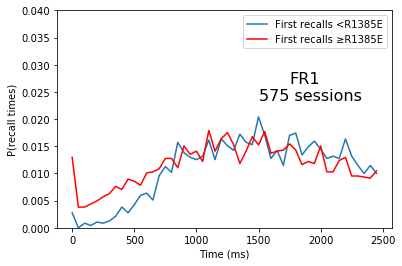

In [47]:
first_hist,_ = np.histogram(first_recall_times_pre,bins=50,range=(0,2500))
first_hist = first_hist/len(first_recall_times_pre)
second_hist,_ = np.histogram(first_recall_times_post,bins=50,range=(0,2500))
second_hist = second_hist/len(first_recall_times_post)
plot(first_hist)
plot(second_hist,Color=(1,0,0))
ylabel('P(recall times)')
xlabel('Time (ms)')
ylim(0,0.04)
xticks(np.arange(0,50.1,10),np.arange(0,2501,500))
legend({'First recalls <R1385E','First recalls ≥R1385E'})
text(35, np.max(first_hist)*1.3, exp,FontSize=16);
text(30, np.max(first_hist)*1.15, str(len(exp_df))+' sessions',FontSize=16);

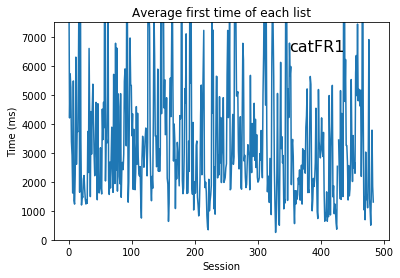

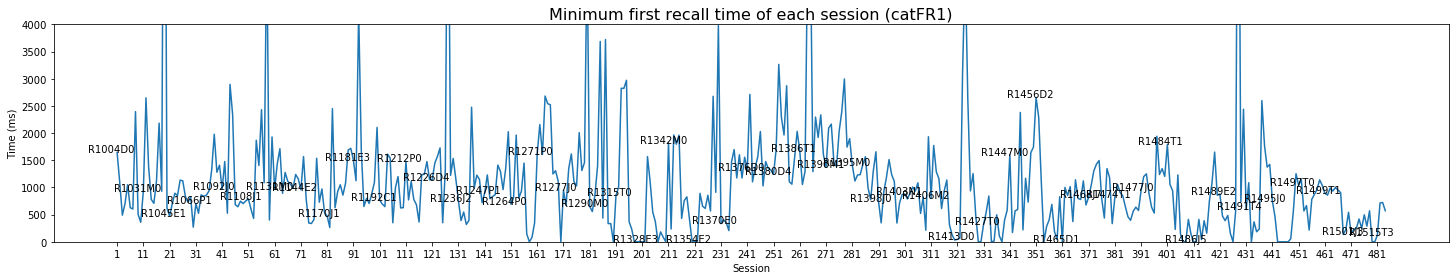

In [5]:
# average first time of each list per session
plot(mean_of_list_first_times); 
ylabel('Time (ms)')
xlabel('Session')
ylim(0,7500)
title('Average first time of each list')
text(350,6500,exp,Size=16)
show()

# minimum time for all lists for each session
subplots(1,1,figsize=(25,4))
plot(np.arange(len(min_time_each_session))+1,min_time_each_session)
ylabel('Time (ms)')
xlabel('Session')
ylim(0,4000)
title('Minimum first recall time of each session ('+exp+')',Size=16)
xticks(np.arange(0,len(mean_of_list_first_times),10)+1)

# get mstimes of each session


NN = 10
# plot sub/sess for every NNth session
for i,row in enumerate(exp_df.itertuples()):
    if np.remainder(i,NN)==0: # every NNth
        text(i-10,min_time_each_session[i],row.subject+str(row.session))
savefig('Minimum_recall_times_per_session_'+exp)

a=1;

## Same but for mstime not session order

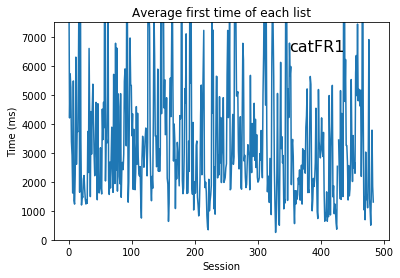

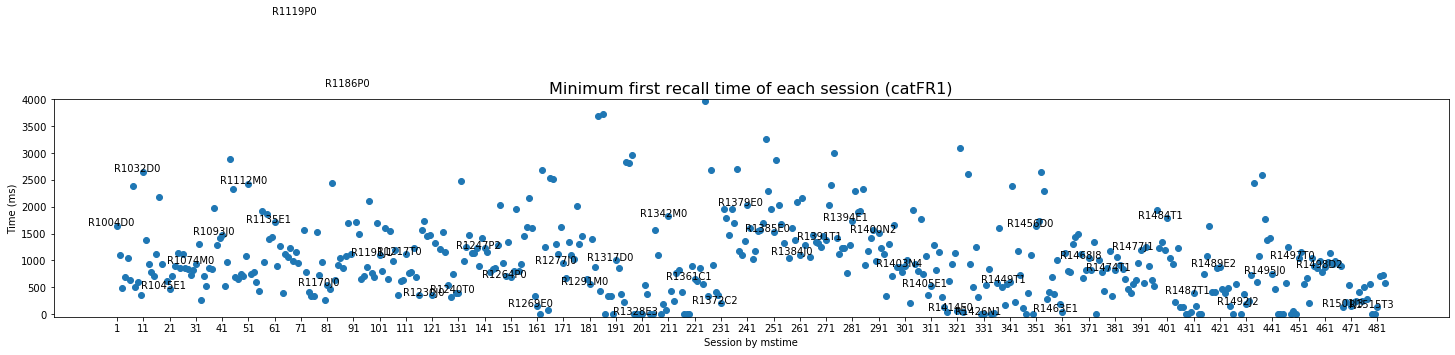

In [5]:
# average first time of each list per session
plot(mean_of_list_first_times); 
ylabel('Time (ms)')
xlabel('Session')
ylim(0,7500)
title('Average first time of each list')
text(350,6500,exp,Size=16)
show()

# reorder by indices of time instead of subject number
idx_by_mstime = np.argsort(sample_mstime_by_session)
mstime_min_time_each_session = np.array(min_time_each_session)[np.argsort(sample_mstime_by_session)]
mstime_min_time_each_session_idx = np.array(min_time_each_session_idx)[np.argsort(sample_mstime_by_session)]
exp_df = exp_df.iloc[idx_by_mstime]

# minimum time for all lists for each session
subplots(1,1,figsize=(25,4))
scatter(np.arange(len(mstime_min_time_each_session))+1,mstime_min_time_each_session)
ylabel('Time (ms)')
xlabel('Session by mstime')
ylim(-50,4000)
title('Minimum first recall time of each session ('+exp+')',Size=16)
xticks(np.arange(0,len(mstime_min_time_each_session),10)+1)

NN = 10

# plot sub/sess for every NNth in order of mstime
for i,row in enumerate(exp_df.itertuples()):
    if np.remainder(i,NN)==0: # every NNth
        text(i-10,mstime_min_time_each_session[i],row.subject+str(row.session))
savefig('Minimum_recall_times_per_session_by_mstime_'+exp)

a=1;

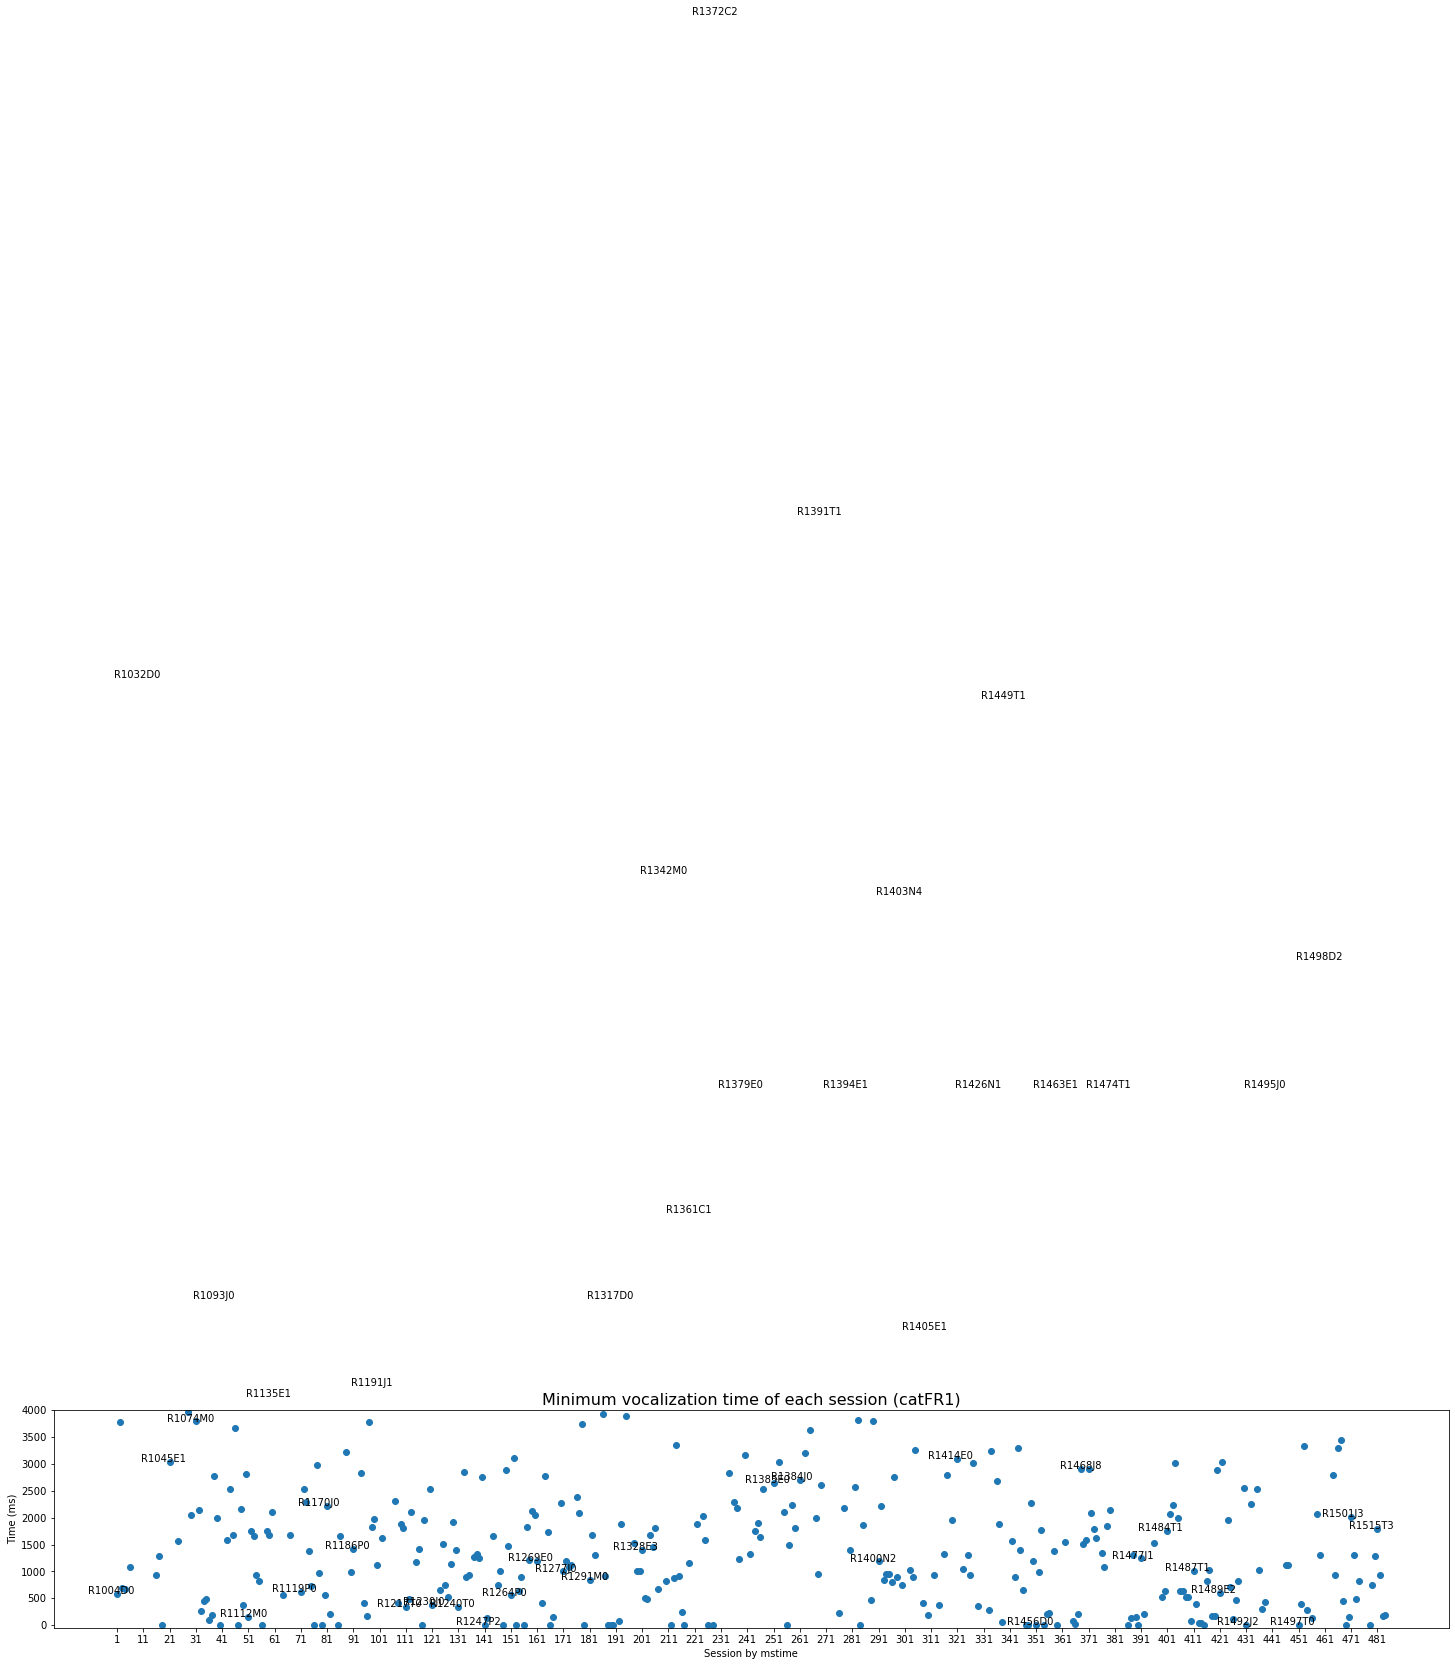

In [23]:
# do same plot for vocalizations

mstime_min_time_vocal_each_session = np.array(min_time_vocal_each_session)[np.argsort(sample_mstime_by_session)]
mstime_min_time_vocal_each_session_idx = np.array(min_time_vocal_each_session_idx)[np.argsort(sample_mstime_by_session)]

# minimum time for all lists for each session
subplots(1,1,figsize=(25,4))
scatter(np.arange(len(mstime_min_time_vocal_each_session))+1,mstime_min_time_vocal_each_session)
ylabel('Time (ms)')
xlabel('Session by mstime')
ylim(-50,4000)
title('Minimum vocalization time of each session ('+exp+')',Size=16)
xticks(np.arange(0,len(mstime_min_time_vocal_each_session),10)+1)

NN = 10

# plot sub/sess for every NNth in order of mstime
for i,row in enumerate(exp_df.itertuples()):
    if np.remainder(i,NN)==0: # every NNth
        text(i-10,mstime_min_time_vocal_each_session[i],row.subject+str(row.session))
savefig('Minimum_vocalization_times_per_session_by_mstime_'+exp)

a=1;

In [17]:
## load Connor data
fn = '/home1/john/SWR/figures/beep_RT_determination/beep_times_update2.pkl'
with open(fn,'rb') as f:
    dat = pickle.load(f)

In [24]:
session_name_list = []
beep_medians = []

sub_list = dat.keys()
for sub in sub_list:
    task_names = dat[sub].keys()
    if 'FR1' in task_names:
        sess_nums = dat[sub]['FR1'].keys()
        for sess in sess_nums:
            session_name_list.append(sub+'-'+str(sess)+'_'+'FR1')
            beep_medians.append( np.median(np.fromiter(dat[sub]['FR1'][sess].values(), dtype=float)) )
    elif 'catFR1' in task_names:
        sess_nums = dat[sub]['catFR1'].keys() 
        for sess in sess_nums:
            session_name_list.append(sub+'-'+str(sess)+'_'+'catFR1')
            beep_medians.append( np.median(np.fromiter(dat[sub]['catFR1'][sess].values(), dtype=float)) )
beep_medians = np.array(beep_medians)

In [37]:
np.array(session_name_list)[(beep_medians<0.4) & (beep_medians>0.15)]

/home1/john/anaconda3/envs/env1/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.
/home1/john/anaconda3/envs/env1/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


array(['R1379E-0_FR1', 'R1379E-1_FR1', 'R1385E-1_FR1', 'R1385E-2_FR1',
       'R1385E-3_FR1', 'R1387E-0_FR1', 'R1387E-1_FR1', 'R1387E-2_FR1',
       'R1394E-0_FR1', 'R1402E-0_FR1'], dtype='<U16')

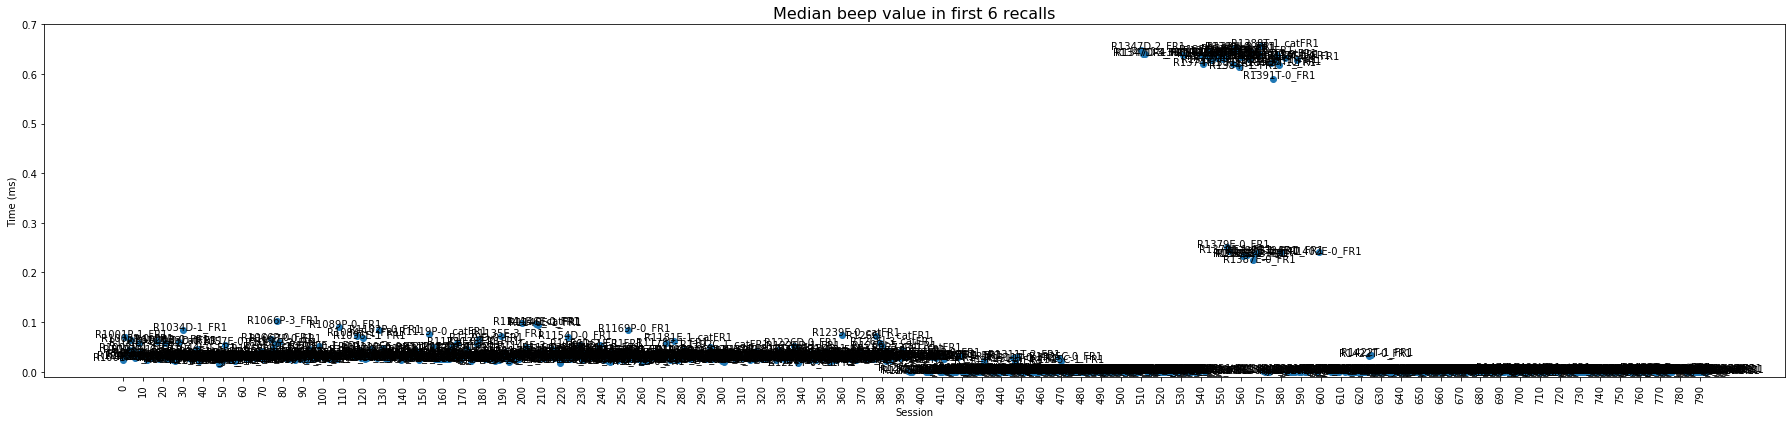

In [35]:
# minimum time for all lists for each session

save_plot = 0

session_start = 0 # 490
session_end = len(session_name_list) # 600
session_plot_list = np.array(session_name_list)[session_start:session_end]
beep_plot_list = beep_medians[session_start:session_end]

subplots(1,1,figsize=(25,6))
# subplots(1,1,figsize=(int((session_end-session_start)*40/800),6))

scatter(range(len(beep_plot_list)),beep_plot_list)
ylabel('Time (ms)')
xlabel('Session')
ylim(-0.01,0.7)
title('Median beep value in first 6 recalls',Size=16)
xticks(np.arange(0,len(beep_plot_list),10),rotation=90)

# plot sub/sess for every NNth in order of mstime
NN=1
for i,row in enumerate(session_plot_list):
    if np.remainder(i,NN)==0: # every NNth
        if np.isnan(beep_plot_list[i])==False:
            if np.remainder(i,3)==0:
                text(i-15,beep_plot_list[i]+0.002,row)
            elif np.remainder(i,3)==1:
                text(i-15,beep_plot_list[i],row)
            else:
                text(i-15,beep_plot_list[i]-0.002,row)
tight_layout()

if save_plot==1:
    savefig('../figures/Median_beep_times_by_session_update2')

a=1;

In [33]:
# beep summary
beep_medians = np.array(beep_medians)
subs_high = np.array(session_name_list)[(beep_medians>=0.4)] # & (beep_medians<1.0)]
subs_medium = np.array(session_name_list)[(beep_medians<0.4) & (beep_medians>=0.15)]
subs_low = np.array(session_name_list)[(beep_medians<0.15)]

print('Subjects over 400 ms:')
subs_high
print('Subjects over 150 and under 400 ms:')
subs_medium
print('Subjects under 150 ms:')
subs_low

Subjects over 400 ms:


/home1/john/anaconda3/envs/env1/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater_equal
  This is separate from the ipykernel package so we can avoid doing imports until
/home1/john/anaconda3/envs/env1/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.
/home1/john/anaconda3/envs/env1/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater_equal
  after removing the cwd from sys.path.
/home1/john/anaconda3/envs/env1/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """


array(['R1347D-2_FR1', 'R1347D-3_FR1', 'R1347D-4_FR1', 'R1366J-0_catFR1',
       'R1374T-0_FR1', 'R1374T-1_FR1', 'R1375C-0_FR1', 'R1376D-0_FR1',
       'R1377M-0_FR1', 'R1377M-1_FR1', 'R1377M-3_FR1', 'R1377M-4_FR1',
       'R1378T-0_FR1', 'R1378T-1_FR1', 'R1378T-2_FR1', 'R1378T-3_FR1',
       'R1380D-1_FR1', 'R1381T-0_FR1', 'R1383J-0_FR1', 'R1384J-0_FR1',
       'R1384J-1_FR1', 'R1384J-2_FR1', 'R1386T-0_FR1', 'R1386T-1_FR1',
       'R1388T-0_catFR1', 'R1388T-1_catFR1', 'R1390M-1_FR1',
       'R1391T-0_FR1', 'R1391T-1_FR1', 'R1391T-2_FR1', 'R1393T-0_FR1',
       'R1395M-0_FR1', 'R1396T-0_FR1'], dtype='<U16')

Subjects over 150 and under 400 ms:


array(['R1379E-0_FR1', 'R1379E-1_FR1', 'R1385E-1_FR1', 'R1385E-2_FR1',
       'R1385E-3_FR1', 'R1387E-0_FR1', 'R1387E-1_FR1', 'R1387E-2_FR1',
       'R1394E-0_FR1', 'R1402E-0_FR1'], dtype='<U16')

Subjects under 150 ms:


array(['R1001P-0_FR1', 'R1001P-1_FR1', 'R1002P-0_FR1', 'R1002P-1_FR1',
       'R1003P-0_FR1', 'R1003P-1_FR1', 'R1004D-0_catFR1', 'R1006P-0_FR1',
       'R1006P-1_FR1', 'R1010J-0_FR1', 'R1010J-1_FR1', 'R1015J-0_FR1',
       'R1016M-0_catFR1', 'R1016M-1_catFR1', 'R1018P-0_FR1',
       'R1021D-0_catFR1', 'R1022J-0_FR1', 'R1023J-0_FR1', 'R1026D-0_FR1',
       'R1027J-0_FR1', 'R1028M-0_catFR1', 'R1028M-1_catFR1',
       'R1030J-0_FR1', 'R1031M-0_FR1', 'R1032D-0_FR1', 'R1033D-0_FR1',
       'R1034D-0_FR1', 'R1034D-1_FR1', 'R1034D-2_FR1', 'R1035M-0_FR1',
       'R1036M-0_FR1', 'R1039M-0_FR1', 'R1041M-0_catFR1', 'R1042M-0_FR1',
       'R1044J-0_FR1', 'R1045E-0_FR1', 'R1048E-0_FR1', 'R1049J-0_FR1',
       'R1050M-0_FR1', 'R1051J-0_FR1', 'R1051J-1_FR1', 'R1051J-2_FR1',
       'R1053M-0_FR1', 'R1054J-0_FR1', 'R1054J-1_FR1', 'R1056M-0_FR1',
       'R1057E-0_FR1', 'R1059J-0_FR1', 'R1059J-1_FR1', 'R1060M-0_FR1',
       'R1060M-1_FR1', 'R1060M-2_FR1', 'R1060M-3_FR1', 'R1061T-0_FR1',
       'R1061T-1_

In [262]:
# get beep medians for given rnage of sessions
check_bins = range(607,620)
np.array(session_name_list)[check_bins]
np.array(beep_medians)[check_bins]


array(['R1405E-1_FR1', 'R1406M-3_FR1', 'R1406M-4_FR1', 'R1408N-0_catFR1',
       'R1408N-1_catFR1', 'R1409D-1_FR1', 'R1409D-2_FR1', 'R1412M-1_FR1',
       'R1413D-0_FR1', 'R1414E-0_FR1', 'R1415T-0_FR1', 'R1415T-1_FR1',
       'R1416T-0_FR1'], dtype='<U16')

array([       nan, 0.        , 0.        ,        nan,        nan,
       0.        , 0.00078231, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [340]:
print('Subjects with vocalizations under 200 ms:')
np.array(exp_df.subject[mstime_min_time_each_session<=200])

array(['R1269E', 'R1269E', 'R1269E', 'R1275D', 'R1313J', 'R1324M',
       'R1328E', 'R1328E', 'R1328E', 'R1328E', 'R1334T', 'R1338T',
       'R1337E', 'R1337E', 'R1354E', 'R1354E', 'R1354E', 'R1412M',
       'R1412M', 'R1414E', 'R1413D', 'R1426N', 'R1426N', 'R1441T',
       'R1441T', 'R1448T', 'R1444D', 'R1444D', 'R1459M', 'R1463E',
       'R1463E', 'R1465D', 'R1486J', 'R1486J', 'R1486J', 'R1486J',
       'R1487T', 'R1487T', 'R1486J', 'R1486J', 'R1490T', 'R1490T',
       'R1492J', 'R1492J', 'R1495J', 'R1495J', 'R1495J', 'R1495J',
       'R1495J', 'R1495J', 'R1501J', 'R1501J', 'R1515T', 'R1515T',
       'R1515T'], dtype=object)

In [36]:
# get info about sessions with close to 0 ms reaction times
example_sub = 'R1515T'
exp = 'catFR1'

exp_df[exp_df.subject==example_sub]
print('sessions (and original_session):')
exp_df.session[exp_df.subject==example_sub].values
exp_df.original_session[exp_df.subject==example_sub].values
print('Min times per session:')
mstime_min_time_each_session[exp_df.subject==example_sub]
print('Wav file with this min time:')
mstime_min_time_each_session_idx[exp_df.subject==example_sub]+1 # always is in wav file 1 after for some reason
print('Median beep time for first 6 wav files:')
temp_beep_times = []
for session in exp_df.session[exp_df.subject==example_sub].values:
    temp_beep_times.append(np.array(beep_medians)[np.array(session_name_list)==example_sub+'-'+str(session)+'_'+exp])
temp_beep_times

,Recognition,all_events,contacts,experiment,import_type,localization,math_events,montage,original_experiment,original_session,pairs,ps4_events,session,subject,subject_alias,system_version,task_events
2326,NaN,protocols/r1/subjects/R1515T/experiments/catFR...,protocols/r1/subjects/R1515T/localizations/0/m...,catFR1,build,0,protocols/r1/subjects/R1515T/experiments/catFR...,0,NaN,NaN,protocols/r1/subjects/R1515T/localizations/0/m...,NaN,0,R1515T,R1515T,3.4,protocols/r1/subjects/R1515T/experiments/catFR...
2327,NaN,protocols/r1/subjects/R1515T/experiments/catFR...,protocols/r1/subjects/R1515T/localizations/0/m...,catFR1,build,0,protocols/r1/subjects/R1515T/experiments/catFR...,0,NaN,NaN,protocols/r1/subjects/R1515T/localizations/0/m...,NaN,1,R1515T,R1515T,3.4,protocols/r1/subjects/R1515T/experiments/catFR...
2328,NaN,protocols/r1/subjects/R1515T/experiments/catFR...,protocols/r1/subjects/R1515T/localizations/0/m...,catFR1,build,0,protocols/r1/subjects/R1515T/experiments/catFR...,0,NaN,NaN,protocols/r1/subjects/R1515T/localizations/0/m...,NaN,2,R1515T,R1515T,3.4,protocols/r1/subjects/R1515T/experiments/catFR...
2329,NaN,protocols/r1/subjects/R1515T/experiments/catFR...,protocols/r1/subjects/R1515T/localizations/0/m...,catFR1,build,0,protocols/r1/subjects/R1515T/experiments/catFR...,0,NaN,NaN,protocols/r1/subjects/R1515T/localizations/0/m...,NaN,3,R1515T,R1515T,3.4,protocols/r1/subjects/R1515T/experiments/catFR...


sessions (and original_session):


array([0, 1, 2, 3])

array([nan, nan, nan, nan], dtype=object)

Min times per session:


array([570,   0,   0, 124])

Wav file with this min time:


array([9, 4, 1, 7])

Median beep time for first 6 wav files:


[array([0.]), array([0.]), array([0.]), array([0.])]

In [7]:
print('Subjects with vocalizations under 200 ms:')
print(np.array(exp_df.subject[mstime_min_time_vocal_each_session<=200]))

Subjects with vocalizations under 200 ms:
['R1042M' 'R1067P' 'R1067P' 'R1089P' 'R1106M' 'R1112M' 'R1130M' 'R1157C'
 'R1169P' 'R1178P' 'R1190P' 'R1228M' 'R1247P' 'R1243T' 'R1260D' 'R1266J'
 'R1266J' 'R1273D' 'R1273D' 'R1288P' 'R1310J' 'R1310J' 'R1313J' 'R1315T'
 'R1348J' 'R1354E' 'R1370E' 'R1367D' 'R1388T' 'R1389J' 'R1398J' 'R1443D'
 'R1444D' 'R1444D' 'R1456D' 'R1456D' 'R1466J' 'R1469D' 'R1469D' 'R1476J'
 'R1476J' 'R1476J' 'R1477J' 'R1487T' 'R1486J' 'R1486J' 'R1488T' 'R1486J'
 'R1486J' 'R1490T' 'R1492J' 'R1497T' 'R1499T' 'R1501J' 'R1501J' 'R1515T'
 'R1518T' 'R1518T']


In [30]:
# same info but for vocalizations
example_sub = 'R1310J'
exp = 'catFR1'

exp_df[exp_df.subject==example_sub]
print('sessions (and original_session):')
exp_df.session[exp_df.subject==example_sub].values
exp_df.original_session[exp_df.subject==example_sub].values
print('Min times per session:')
mstime_min_time_vocal_each_session[exp_df.subject==example_sub]
print('Wav file with this min time:')
mstime_min_time_vocal_each_session_idx[exp_df.subject==example_sub]+1 # always is in wav file 1 after for some reason
print('Median beep time for first 6 wav files:')
temp_beep_times = []
for session in exp_df.session[exp_df.subject==example_sub].values:
    temp_beep_times.append(np.array(beep_medians)[np.array(session_name_list)==example_sub+'-'+str(session)+'_'+exp])
temp_beep_times


,Recognition,all_events,contacts,experiment,import_type,localization,math_events,montage,original_experiment,original_session,pairs,ps4_events,session,subject,subject_alias,system_version,task_events
1639,NaN,protocols/r1/subjects/R1310J/experiments/catFR...,protocols/r1/subjects/R1310J/localizations/0/m...,catFR1,build,0,protocols/r1/subjects/R1310J/experiments/catFR...,0,NaN,NaN,protocols/r1/subjects/R1310J/localizations/0/m...,NaN,0,R1310J,R1310J,3.1,protocols/r1/subjects/R1310J/experiments/catFR...
1640,NaN,protocols/r1/subjects/R1310J/experiments/catFR...,protocols/r1/subjects/R1310J/localizations/0/m...,catFR1,build,0,protocols/r1/subjects/R1310J/experiments/catFR...,0,NaN,0,protocols/r1/subjects/R1310J/localizations/0/m...,NaN,1,R1310J,R1310J,3.1,protocols/r1/subjects/R1310J/experiments/catFR...


sessions (and original_session):


array([0, 1])

array([nan, '0'], dtype=object)

Min times per session:


array([0, 0])

Wav file with this min time:


array([8, 8])

Median beep time for first 6 wav files:


[array([], dtype=float64), array([], dtype=float64)]